<a href="https://colab.research.google.com/github/siddsh/Movie-Review-Classification/blob/master/Classical_ML_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
%matplotlib inline

# Splitting data and Labelling targets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Vectorizing text data
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Dimension Reduction and Standardizing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

# Clustering
from sklearn.cluster import KMeans

# Benchmarking metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import jaccard_score
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# ML models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier

# Data

### Loading Data

In [4]:
# Loading data

df = pd.read_csv("data_with_others_16_sectors.csv")
print(len(df['Major Sector'].unique()))
df

16


,URL,Tender Data,Major Sector
0,http://projects.worldbank.org/procurement/noti...,term reference individual international reside...,National Government
1,http://projects.worldbank.org/procurement/noti...,contract award project eg household natural ga...,Oil and Gas
2,http://projects.worldbank.org/procurement/noti...,contract award project eg household natural ga...,Oil and Gas
3,http://projects.worldbank.org/procurement/noti...,contract award project urban productive safety...,Social Protection
4,http://projects.worldbank.org/procurement/noti...,contract award project eg household natural ga...,Oil and Gas
...,...,...,...
1811,http://projects.worldbank.org/procurement/noti...,islamic republic afghanistan ministry energy w...,Agriculture
1812,http://projects.worldbank.org/procurement/noti...,islamic republic afghanistan ministry energy w...,Agriculture
1813,http://projects.worldbank.org/procurement/noti...,islamic republic afghanistan ministry energy w...,Agriculture
1814,http://projects.worldbank.org/procurement/noti...,contract award project second public financial...,National Government


### X, Y and Split

In [5]:
# Deciding X and Y and train_test_split

X = df['Tender Data']
Y = df['Major Sector']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=1,
                                                    test_size=0.25)

print(train_X)
print(train_X.shape)
print(test_X.shape)

1621    specific procurement notice procurement good c...
1338    government nepal ministry agriculture livestoc...
286     small assignment contract award project social...
1152    contract award project belarus health system m...
1622    invitation bids mongolia implementation statis...
                              ...                        
905     contract award project pmg sy rural road proje...
1791    request expression interest consulting service...
1096    contract award project central african republi...
235     small assignment contract award project social...
1061    bid document gem publish gem please visit www ...
Name: Tender Data, Length: 1362, dtype: object
(1362,)
(454,)


### Label Encoding

In [6]:
# Label Encoding Y

Encoder = LabelEncoder()

Encoder.fit(train_Y)
train_Y = Encoder.transform(train_Y)
test_Y = Encoder.transform(test_Y)

print(train_Y)
print(train_Y.shape)
print(test_Y)
print(test_Y.shape)

[ 4  0 13 ... 11 13  0]
(1362,)
[13 15 14 13 15  0  0  6 15  0 13 10 12  2 13  8 15 14  2 11 12 15  1  2
  5  8  8 10  6  0  2 10  4 10  8  6 12  0 14  3  0 12  6  4  4  0  8  8
 15 10 12  8  5 11 14 13 13 15  5 12 14  3 12 13 15  7  4  0  1 10 12  0
  4  8  0 13 12 12 12  0 14  2 13  5  7  0  0  7  0 10 13  2  0  1  3  0
 15  0 13  0  0 13 13 15 10  0 15  0  0  0 15 10 15 13 14  0  4  2 15  0
  1  0 13 15  1  8  8 15  1 12  4  4  6 15  6 11 12  0 13  1  0  5 13 14
 13 10 14  5  1  0  2  2  0  0  2 15 10 12 12  5  8 11 14 14 13  2 14 11
  7 13  0 13  8  5 13  4  2 13  2 13 15 12 13 12 12 13 10  7 14  4 12  0
 12  0 12  2 13  0 10 10 14  3 12 13 12 11 12  0  2  6 13  8  0  0  2  5
 12  0  2 13 11  7  6 13 12  4  0  8  6 15  8 11 11  9  7 12 14 13 13 15
 13 15  9 13  2  4 11  4  8 15  0  8 10 12  1 15 13  7 14  5 12  5  8  4
  6 14 15  8 13  1 14  2 14  0 14  9 13  7  5 14  5 13  2 15 11  8 15  2
  8  2 12  0 14  0 14 15 10 12 11 11 13  3 13  4  2 10 10  0  4 11  0 15
  5  0  7  0  2 12 

# Feature Extraction

### Count Vectorization

In [7]:
### FEATURE EXTRACTION from X

# count Vectorizer

count_vectorizer = CountVectorizer(max_features=None, ngram_range=(1,1), 
                                   stop_words='english', min_df=1, max_df=1.0)

count_vectorizer.fit(train_X)
train_X_count = count_vectorizer.transform(train_X)
test_X_count = count_vectorizer.transform(test_X)

print(train_X_count.shape)
print(train_X_count)

(1362, 13794)
  (0, 49)	1
  (0, 170)	1
  (0, 182)	8
  (0, 692)	1
  (0, 697)	1
  (0, 858)	1
  (0, 885)	1
  (0, 906)	1
  (0, 925)	1
  (0, 927)	1
  (0, 966)	2
  (0, 1131)	1
  (0, 1152)	1
  (0, 1153)	1
  (0, 1353)	7
  (0, 1354)	4
  (0, 1355)	1
  (0, 1356)	5
  (0, 1358)	1
  (0, 1511)	1
  (0, 1701)	6
  (0, 1837)	1
  (0, 2051)	1
  (0, 2089)	1
  (0, 2144)	1
  :	:
  (1360, 9255)	1
  (1360, 9577)	1
  (1360, 9652)	1
  (1360, 9722)	1
  (1360, 9761)	2
  (1360, 10065)	1
  (1360, 10262)	1
  (1360, 10880)	1
  (1360, 11028)	1
  (1360, 11122)	1
  (1360, 11478)	1
  (1360, 11498)	1
  (1360, 11957)	1
  (1360, 12634)	1
  (1360, 12878)	1
  (1360, 13214)	1
  (1360, 13281)	1
  (1360, 13720)	1
  (1361, 1353)	1
  (1361, 3520)	1
  (1361, 5016)	3
  (1361, 5197)	1
  (1361, 9870)	1
  (1361, 13314)	1
  (1361, 13608)	1


### TFIDF Vectorization

In [8]:
# tfidf vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=None, stop_words='english',
                                   ngram_range=(1,1), min_df=1, max_df=1.0)

tfidf_vectorizer.fit(train_X)
train_X_tfidf = tfidf_vectorizer.transform(train_X)
test_X_tfidf = tfidf_vectorizer.transform(test_X)

print(train_X_tfidf.shape)
print(train_X_tfidf)

(1362, 13794)
  (0, 13771)	0.03851155490117727
  (0, 13608)	0.03774682009213812
  (0, 13592)	0.0215511986798702
  (0, 13575)	0.028880209529000386
  (0, 13564)	0.015552506977293377
  (0, 13513)	0.03729605495534441
  (0, 13452)	0.02068248475123985
  (0, 13447)	0.030312251466310974
  (0, 13423)	0.22988924880717523
  (0, 13097)	0.28043124849634216
  (0, 13006)	0.2554866948322283
  (0, 12717)	0.0443586672587441
  (0, 12508)	0.020862469473322473
  (0, 12426)	0.061190419829408774
  (0, 12223)	0.02082610426255103
  (0, 11997)	0.07582584053703284
  (0, 11892)	0.018018955262148105
  (0, 11742)	0.018018955262148105
  (0, 11631)	0.020972700554994353
  (0, 11623)	0.020789925063901114
  (0, 11415)	0.024143197692332828
  (0, 11217)	0.17972358921542947
  (0, 11198)	0.034210076741284234
  (0, 11191)	0.019269602609252753
  (0, 11086)	0.020335698734037344
  :	:
  (1360, 3011)	0.1752922698646894
  (1360, 2908)	0.08730428451515033
  (1360, 2854)	0.08529067171202524
  (1360, 2815)	0.045092584926142265
  (13

# Dimensionality Reduction

### PCA

#### Scaling data (tfidf csr output matrix)

In [9]:
### DIMENSIONALITY REDUCTION (of tfidf csr matrix)

## PCA

# scaling data

scaler = StandardScaler()

scaler.fit(train_X_tfidf.toarray())
train_X_scaled = scaler.transform(train_X_tfidf.toarray())
test_X_scaled = scaler.transform(test_X_tfidf.toarray())

print(train_X_scaled.shape)
print(train_X_scaled)

(1362, 13794)
[[-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]
 [-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]
 [-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]
 ...
 [-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]
 [-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]
 [-0.02710634 -0.04472151 -0.03834825 ... -0.02710634 -0.03489762
  -0.0383437 ]]


#### Plotting n_comp vs cumulative variance to choose optimal PCs

Number of components = 5 and explained variance = 0.03306958175262263
Number of components = 10 and explained variance = 0.054379081694764624
Number of components = 15 and explained variance = 0.07273977501183311
Number of components = 20 and explained variance = 0.08984605648377361
Number of components = 50 and explained variance = 0.17501178207446005
Number of components = 100 and explained variance = 0.286622287950948
Number of components = 200 and explained variance = 0.4471720015197237
Number of components = 300 and explained variance = 0.5696948729597372
Number of components = 400 and explained variance = 0.666367350890093
Number of components = 500 and explained variance = 0.7445950719545261
Number of components = 600 and explained variance = 0.8088489031057929
Number of components = 700 and explained variance = 0.8608813452940802
Number of components = 800 and explained variance = 0.9029190869352265
Number of components = 900 and explained variance = 0.9364062266854712
Number o

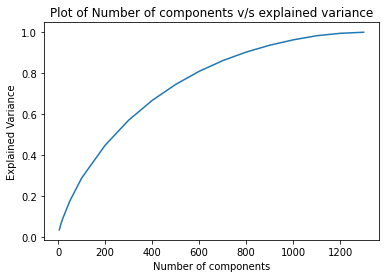

In [10]:
# Program to choose the optimal PCs i.e. n_components

n_comp = [5,10,15,20,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300] # list containing different values of components
explained = [] # explained variance ratio for each component of PCA

for x in n_comp:
    pca = PCA(n_components=x,  random_state=1)
    pca.fit(train_X_scaled)
    explained.append(pca.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,pca.explained_variance_ratio_.sum()))

plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

#### fitting scaled data

In [11]:
# choosing optimal n_components based on variance graph

pca = PCA(n_components = 800, random_state=1)

pca.fit(train_X_scaled)
train_X_pca = pca.transform(train_X_scaled)
test_X_pca = pca.transform(test_X_scaled)

explained_variance = pca.explained_variance_ratio_.sum()
print("Explained variance of the PCA step: {}%".format(int(explained_variance * 100)))

print(train_X_pca.shape)
print(test_X_pca.shape)
print(train_X_pca)

Explained variance of the PCA step: 90%
(1362, 800)
(454, 800)
[[-1.54067878  0.66161609 -6.17693949 ... -2.14563212  1.43497979
  -0.12459344]
 [-0.74692716  1.80350015 -8.22438541 ...  1.16711384  0.71842602
  -0.65573279]
 [-5.01791827 -6.08121916  5.16450168 ...  1.5640191   0.81562326
  -3.05345063]
 ...
 [-4.427826   -4.75162937  3.40008503 ...  1.30957396  2.45476275
  -0.25623451]
 [-5.08561435 -6.32167772  5.00709479 ... -0.11235868 -0.6620144
  -0.96520194]
 [-3.68897595 -3.84901449  1.77249101 ...  0.80786938  0.06494683
   0.40611923]]


### Truncated SVD

#### Plotting n_comp vs cumulative variance to choose optimal n_comp for SVD

Number of components = 5 and explained variance = 0.1076368129657129
Number of components = 10 and explained variance = 0.167091036450209
Number of components = 15 and explained variance = 0.20266777006218584
Number of components = 20 and explained variance = 0.2303884851462683
Number of components = 50 and explained variance = 0.34339750762255583
Number of components = 100 and explained variance = 0.45288449563016325
Number of components = 200 and explained variance = 0.5876744741638293
Number of components = 300 and explained variance = 0.6799100020804989
Number of components = 400 and explained variance = 0.7518171735919162
Number of components = 500 and explained variance = 0.8100689558631053
Number of components = 600 and explained variance = 0.8579407170044024
Number of components = 700 and explained variance = 0.8971790551957672
Number of components = 800 and explained variance = 0.9289711969424217
Number of components = 900 and explained variance = 0.9542918864655012
Number of 

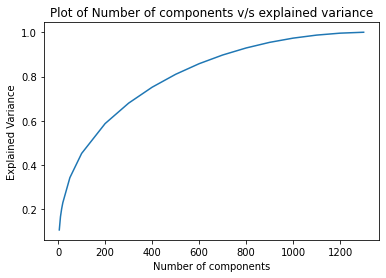

In [12]:
# Truncated SVD

# Program to find the optimal number of components for Truncated SVD

n_comp = [5,10,15,20,50,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300] # list containing different values of components
explained = [] # explained variance ratio for each component of Truncated SVD

for x in n_comp:
    svd = TruncatedSVD(n_components=x,random_state=1)
    svd.fit(train_X_tfidf)
    explained.append(svd.explained_variance_ratio_.sum())
    print("Number of components = %r and explained variance = %r"%(x,svd.explained_variance_ratio_.sum()))
plt.plot(n_comp, explained)
plt.xlabel('Number of components')
plt.ylabel("Explained Variance")
plt.title("Plot of Number of components v/s explained variance")
plt.show()

#### Normalizing and fitting

In [13]:
# setting optimal n_components based on variance graph and normalizing data

svd = TruncatedSVD(n_components = 700, random_state=1)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd,normalizer)

lsa.fit(train_X_tfidf)
train_X_svd = lsa.transform(train_X_tfidf)
test_X_svd = lsa.transform(test_X_tfidf)

explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

print(train_X_svd.shape)
print(test_X_svd.shape)
print(train_X_svd)

Explained variance of the SVD step: 89%
(1362, 700)
(454, 700)
[[ 1.69942534e-01  1.98558838e-01 -8.71890194e-02 ...  6.91098489e-03
   2.46063073e-02  8.39789964e-03]
 [ 2.18359519e-01  2.67905189e-01 -4.35012258e-02 ...  8.90529187e-03
  -8.01554765e-05 -9.55891022e-03]
 [ 4.14086488e-01 -5.00299587e-01 -2.29482235e-01 ...  1.85106617e-04
  -7.52557596e-03  2.32730683e-02]
 ...
 [ 2.95788781e-01  7.34454088e-02  1.62864484e-01 ... -5.19363982e-02
   4.10661153e-02 -2.39386100e-02]
 [ 4.24236885e-01 -5.13673672e-01 -2.36616702e-01 ...  1.46334766e-02
   6.07116448e-03  5.27933069e-03]
 [ 6.92280359e-02  1.48329777e-01  7.41760052e-03 ... -1.64387737e-04
   8.96590486e-04 -1.33450521e-04]]


## Visualizing and checking data using K-Means Clustering

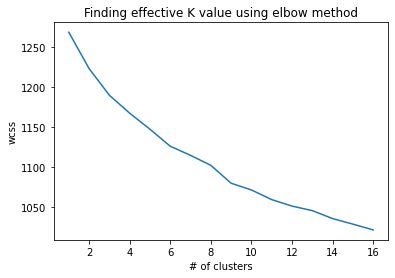

In [14]:
# K-Means Clustering

wcss = [] # Within-CLuster-Sum-of-Squares

for i in range(1,17):
    model_kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=1)
    model_kmeans.fit(train_X_svd)
    wcss.append(model_kmeans.inertia_)
    
plt.plot(range(1,17),wcss)
plt.title("Finding effective K value using elbow method")
plt.xlabel("# of clusters")
plt.ylabel("wcss")
plt.show()

## BenchMarking functions

In [15]:
### BENCHMARKING
# classification_report
# plot confusion matrix
# check for over/under-fitting by plotting curves
### learning curves
### error curves
# print metrics like accuracy,
### precision
### recall
### f1-score
# pr and roc curves


### PLOTTING CURVES
def plot_learning_curves(model, feature, target):

    # fit
    model.fit(feature,target)
    
    
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    cv = StratifiedKFold(n_splits=10)
    train_sizes, train_scores, test_scores = learning_curve(model, feature, target,
                                                            cv=cv, train_sizes=np.linspace(.1, 1.0, 5),
                                                            verbose=0)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(model)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    plt.show()


#NOTE : MSE and any type of squared error metric is usually not used for Classification...instead Precision-Recall Curves are used
# def plot_error_curves(model,feature,target):
    
#     model.fit(feature,target)
    
#     cv = StratifiedKFold(n_splits=10)
#     train_sizes, train_scores, validation_scores = learning_curve(model,feature, target, 
#                                                                   train_sizes=np.linspace(.1, 1.0, 5), cv = cv,
#                                                                   scoring = 'neg_mean_squared_error')
#     train_scores_mean = -train_scores.mean(axis = 1)
#     validation_scores_mean = -validation_scores.mean(axis = 1)
# #     print('Training scores:\n\n', train_scores)
# #     print('\n', '-' * 70) # separator to make the output easy to read
# #     print('\nValidation scores:\n\n', validation_scores)

#     #plt.style.use('seaborn')
#     plt.plot(train_sizes, train_scores_mean, label = 'Training error')
#     plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
#     plt.ylabel('MSE', fontsize = 14)
#     plt.xlabel('Training set size', fontsize = 14)
#     #plt.title('Learning curves for a SVM model', fontsize = 18, y = 1.03)
#     plt.title(model)
#     plt.legend()
#     plt.ylim(0,40)
#     plt.show()


def eval_model(model,feature,target):
    # evaluate the model
    cv = StratifiedKFold(n_splits=10)
    n_scores = cross_val_score(model, feature, target, scoring='accuracy', cv=cv, error_score='raise',verbose=0)
    # report performance
    print('StratifiedKFold CV Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

#plot_confusion_matrix(model, valid_X, valid_Y)
# plt.show()
#print(confusion_matrix(valid_Y,predictions_SVM))
#print(classification_report(valid_Y,predictions))

### Precison-Recall curves
def plot_pr_curves(model, train_feature, test_feature, train_target, test_target):
    n_classes = len(set(test_target))
    binarized_train_target = label_binarize(train_target, classes=[*range(n_classes)])
    binarized_test_target = label_binarize(test_target, classes=[*range(n_classes)])
    model.fit(train_feature, train_target)
    target_score = model.predict_proba(test_feature)
    
    # pr curve
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(binarized_test_target[:, i],
                                                            target_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

def plot_roc_curves(model, train_feature, test_feature, train_target, test_target):
    n_classes = len(set(test_target))
    binarized_train_target = label_binarize(train_target, classes=[*range(n_classes)])
    binarized_test_target = label_binarize(test_target, classes=[*range(n_classes)])
    model.fit(train_feature, train_target)
    target_score = model.predict_proba(test_feature)
    
    # roc curve
    fpr = dict()
    tpr = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(binarized_test_target[:, i],
                                      target_score[:, i])
        plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.legend(loc="best")
    plt.title("ROC curve")
    plt.show()

# Training ML Models

### MNB - Multinomial Naive Bayes

MNB count Train Accuracy ->  81.79148311306902
MNB count Test Accuracy ->  60.57268722466961
####################################################################################################
####################################################################################################
####################################################################################################
MNB tfidf Train Accuracy->  98.97209985315712
MNB tfidf Test Accuracy ->  75.33039647577093


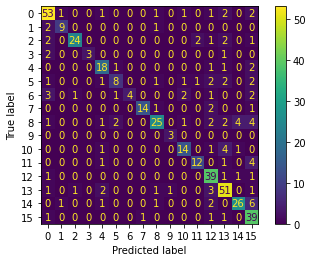

[[53  1  0  0  1  0  0  0  1  0  1  0  1  2  0  2]
 [ 2  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0 24  0  0  0  0  0  0  0  0  2  1  2  0  1]
 [ 2  0  0  3  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0 18  1  0  0  0  0  0  0  1  1  0  2]
 [ 1  0  0  0  1  8  0  0  1  0  1  1  2  2  0  2]
 [ 3  0  1  0  0  1  4  0  0  0  2  0  1  0  0  2]
 [ 0  0  0  0  0  0  0 14  1  0  0  0  2  0  0  1]
 [ 1  0  0  0  1  2  0  0 25  0  1  0  2  2  4  4]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 14  0  1  4  1  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 12  0  1  0  4]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 39  1  1  1]
 [ 1  0  1  0  2  0  0  0  1  1  0  0  3 51  0  1]
 [ 0  1  0  0  1  0  0  0  1  0  0  0  2  0 26  6]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  1  1  0 39]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        62
           1       0.82      0.75      0.78        12
           2       0

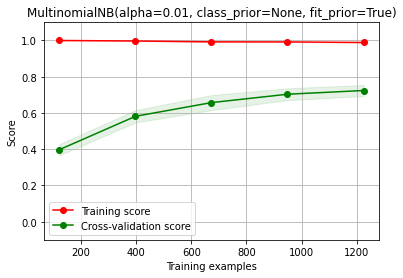

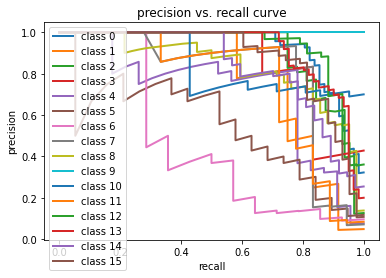

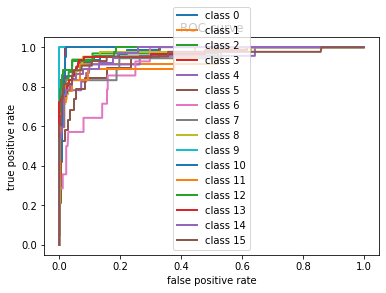

In [17]:
# MNB

# fit on COUNT

Naive = MultinomialNB()
Naive.fit(train_X_count,train_Y)

preds = Naive.predict(train_X_count)
print("MNB count Train Accuracy -> ",accuracy_score(preds, train_Y)*100)
preds = Naive.predict(test_X_count)
print("MNB count Test Accuracy -> ",accuracy_score(preds, test_Y)*100)


#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################


# fit on TFIDF

Naive = MultinomialNB(alpha=0.01)
Naive.fit(train_X_tfidf,train_Y)

preds = Naive.predict(train_X_tfidf)
print("MNB tfidf Train Accuracy-> ",accuracy_score(preds, train_Y)*100)
preds = Naive.predict(test_X_tfidf)
print("MNB tfidf Test Accuracy -> ",accuracy_score(preds, test_Y)*100)

# BENCHMARKING

# plot confusion matrix
plot_confusion_matrix(Naive, test_X_tfidf, test_Y)
plt.show()
print(confusion_matrix(test_Y,preds))

# print classification report
print(classification_report(test_Y,preds))

# evaluate the model
eval_model(Naive, train_X_tfidf, train_Y)

# plot curves
plot_learning_curves(Naive, train_X_tfidf, train_Y)
# plot_error_curves(Naive,train_X_tfidf, train_Y)
plot_pr_curves(Naive, train_X_tfidf, test_X_tfidf, train_Y, test_Y)
plot_roc_curves(Naive, train_X_tfidf, test_X_tfidf, train_Y, test_Y)

### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR COUNT Train Accuracy =  99.41262848751835
LR COUNT Test Accuracy =  71.58590308370044
####################################################################################################
####################################################################################################
####################################################################################################


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR TFID Train Accuracy =  99.41262848751835
LR TFID Test Accuracy =  75.99118942731278
####################################################################################################
####################################################################################################
####################################################################################################


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR TFIDF PCA Train Accuracy =  99.41262848751835
LR TFIDF PCA Test Accuracy =  72.4669603524229
####################################################################################################
####################################################################################################
####################################################################################################
LR TFIDF SVD Train Accuracy =  98.97209985315712
LR TFIDF SVD Test Accuracy=  80.1762114537445


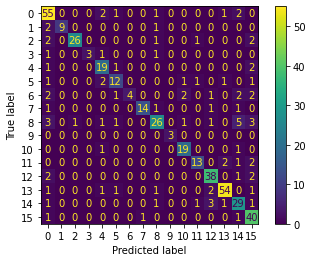

[[55  0  0  0  2  1  0  0  1  0  0  0  0  1  2  0]
 [ 2  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0 26  0  0  0  0  0  1  0  0  1  0  0  0  2]
 [ 1  0  0  3  1  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0 19  1  0  0  0  0  0  0  0  0  0  2]
 [ 1  0  0  0  2 12  0  0  0  0  1  1  0  1  0  1]
 [ 2  0  0  0  0  1  4  0  0  0  2  0  1  0  2  2]
 [ 1  0  0  0  0  0  0 14  1  0  0  0  1  0  1  0]
 [ 3  0  1  0  1  1  0  0 26  0  1  0  1  0  5  3]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 19  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  2  1  2]
 [ 2  0  0  0  0  0  0  0  0  0  0  0 38  0  1  2]
 [ 1  0  0  0  1  1  0  0  1  0  0  0  2 54  0  1]
 [ 1  0  0  0  0  0  0  0  1  0  0  1  3  1 29  1]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0  0  1 40]]
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        62
           1       1.00      0.75      0.86        12
           2       0

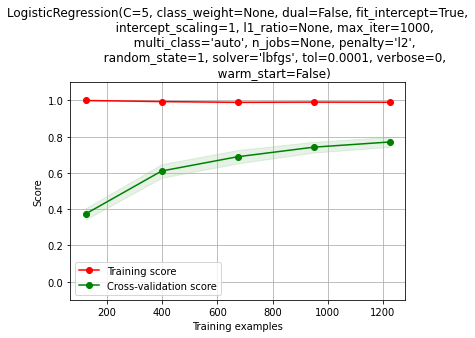

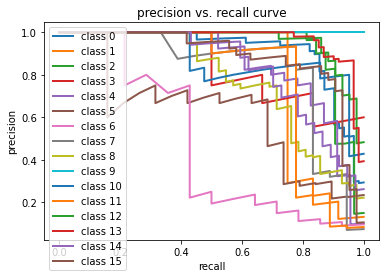

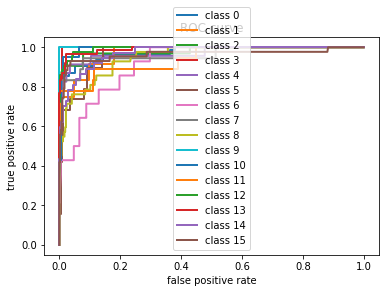

In [18]:
### Logistic Regression

# COUNT

# scaling data for lr
scaler = StandardScaler()
scaler.fit(train_X_count.toarray())
train_X_scaled = scaler.transform(train_X_count.toarray())
test_X_scaled = scaler.transform(test_X_count.toarray())

# LR using scaled COUNT
LR = LogisticRegression()
LR.fit(train_X_scaled,train_Y)
preds = LR.predict(train_X_scaled)
print("LR COUNT Train Accuracy = ",accuracy_score(preds, train_Y)*100)
preds = LR.predict(test_X_scaled)
print("LR COUNT Test Accuracy = ",accuracy_score(preds, test_Y)*100)

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# TFIDF

# scaling data for lr
scaler = StandardScaler()
scaler.fit(train_X_tfidf.toarray())
train_X_scaled = scaler.transform(train_X_tfidf.toarray())
test_X_scaled = scaler.transform(test_X_tfidf.toarray())

# LR using scaled TFIDF
LR = LogisticRegression()
LR.fit(train_X_scaled,train_Y)
preds = LR.predict(train_X_scaled)
print("LR TFID Train Accuracy = ",accuracy_score(preds, train_Y)*100)
preds = LR.predict(test_X_scaled)
print("LR TFID Test Accuracy = ",accuracy_score(preds, test_Y)*100)

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# TFIDF after PCA

LR = LogisticRegression()
LR.fit(train_X_pca,train_Y)
preds = LR.predict(train_X_pca)
print("LR TFIDF PCA Train Accuracy = ",accuracy_score(preds, train_Y)*100)
preds = LR.predict(test_X_pca)
print("LR TFIDF PCA Test Accuracy = ",accuracy_score(preds, test_Y)*100)

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# LR using TFIDF after TruncatedSVD

LR = LogisticRegression(C=5, max_iter=1000, random_state=1)
LR.fit(train_X_svd,train_Y)
preds = LR.predict(train_X_svd)
print("LR TFIDF SVD Train Accuracy = ",accuracy_score(preds, train_Y)*100)
preds = LR.predict(test_X_svd)
print("LR TFIDF SVD Test Accuracy= ",accuracy_score(preds, test_Y)*100)

# BENCHMARKING

# plot confusion matrix
plot_confusion_matrix(LR, test_X_svd, test_Y)
plt.show()
print(confusion_matrix(test_Y,preds))

# print classification report
print(classification_report(test_Y,preds))

# evaluate the model
eval_model(LR, train_X_svd, train_Y)

# plot curves
plot_learning_curves(LR, train_X_svd, train_Y)
# plot_error_curves(LR, train_X_svd, train_Y)
plot_pr_curves(LR, train_X_svd, test_X_svd, train_Y, test_Y)
plot_roc_curves(LR, train_X_svd, test_X_svd, train_Y, test_Y)

### SVM

##### fitting on Count and TFIDF

SVM Count Train Accuracy =  99.41262848751835
SVM Count Test Accuracy =  72.02643171806167
####################################################################################################
####################################################################################################
####################################################################################################
SVM TFIDF Train Accuracy =  99.33920704845815
SVM TFIDF Test Accuracy =  80.39647577092511


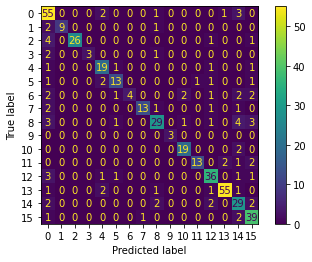

[[55  0  0  0  2  0  0  0  1  0  0  0  0  1  3  0]
 [ 2  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 4  0 26  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 2  0  0  3  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0 19  1  0  0  0  0  0  0  1  0  0  1]
 [ 1  0  0  0  2 13  0  0  0  0  0  1  1  0  0  1]
 [ 2  0  0  0  0  1  4  0  0  0  2  0  1  0  2  2]
 [ 2  0  0  0  0  0  0 13  1  0  0  0  1  0  1  0]
 [ 3  0  0  0  0  1  0  0 29  0  1  0  1  0  4  3]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 13  0  2  1  2]
 [ 3  0  0  0  1  1  0  0  0  0  0  0 36  0  1  1]
 [ 1  0  0  0  2  0  0  0  1  0  0  0  1 55  1  0]
 [ 2  0  0  0  0  0  0  0  2  0  0  0  2  0 29  2]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  0  0  2 39]]
              precision    recall  f1-score   support

           0       0.70      0.89      0.78        62
           1       1.00      0.75      0.86        12
           2       1

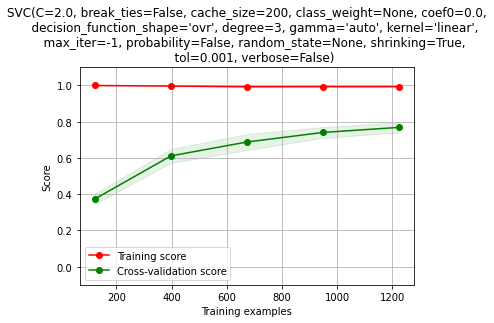

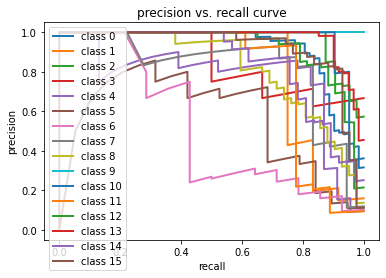

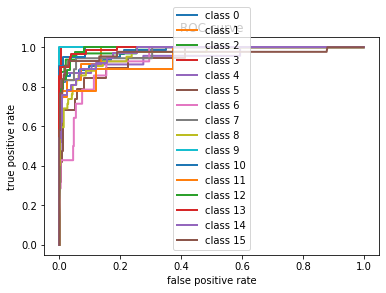

In [20]:
# SVM using COUNT to fit

SVM = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_count,train_Y)

predictions_SVM = SVM.predict(train_X_count)
print("SVM Count Train Accuracy = ",accuracy_score(predictions_SVM, train_Y)*100)
predictions_SVM = SVM.predict(test_X_count)
print("SVM Count Test Accuracy = ",accuracy_score(predictions_SVM, test_Y)*100)

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# SVM using TFIDF to fit

SVM = SVC(C=2.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_tfidf,train_Y)

predictions_SVM = SVM.predict(train_X_tfidf)
print("SVM TFIDF Train Accuracy = ",accuracy_score(predictions_SVM, train_Y)*100)
predictions_SVM = SVM.predict(test_X_tfidf)
print("SVM TFIDF Test Accuracy = ",accuracy_score(predictions_SVM, test_Y)*100)

# BENCHMARKING

# plot confusion matrix
plot_confusion_matrix(SVM, test_X_tfidf, test_Y)
plt.show()
print(confusion_matrix(test_Y,predictions_SVM))

# print classification report
print(classification_report(test_Y,predictions_SVM))

# evaluate the model
eval_model(SVM, train_X_tfidf, train_Y)

# plot curves
plot_learning_curves(SVM, train_X_tfidf, train_Y)
# plot_error_curves(SVM, train_X_tfidf, train_Y)
SVM = SVC(C=2.0, kernel='linear', degree=3, gamma='auto', probability=True)
plot_pr_curves(SVM, train_X_tfidf, test_X_tfidf, train_Y, test_Y)
plot_roc_curves(SVM, train_X_tfidf, test_X_tfidf, train_Y, test_Y)

##### fitting on TFIDF after PCA, TruncatedSVD

SVM TFIDF PCA Train Accuracy =  96.32892804698973
SVM TFIDF PCA Test Accuracy =  64.97797356828194


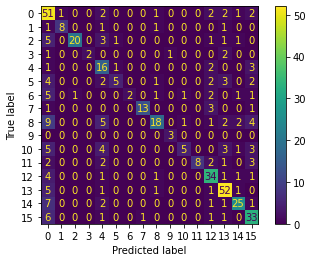

[[51  1  0  0  2  0  0  0  1  0  0  0  2  2  1  2]
 [ 1  8  0  0  1  0  0  0  1  0  0  0  0  1  0  0]
 [ 5  0 20  0  3  1  0  0  0  0  0  0  1  1  1  0]
 [ 1  0  0  2  0  0  0  0  0  1  0  0  0  2  0  0]
 [ 1  0  0  0 16  1  0  0  0  0  0  0  2  0  0  3]
 [ 4  0  0  0  2  5  0  0  1  0  0  0  2  3  0  2]
 [ 5  0  1  0  0  0  2  0  1  0  1  0  2  0  1  1]
 [ 1  0  0  0  0  0  0 13  0  0  0  0  3  0  0  1]
 [ 9  0  0  0  5  0  0  0 18  0  1  0  1  2  2  4]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 5  0  0  0  4  0  0  0  0  0  5  0  0  3  1  3]
 [ 2  0  0  0  2  0  0  0  0  0  0  8  2  1  0  3]
 [ 4  0  0  0  1  0  0  0  1  0  0  0 34  1  1  1]
 [ 5  0  0  0  1  0  0  0  1  0  0  0  1 52  1  0]
 [ 7  0  0  0  2  0  0  0  0  0  0  0  1  1 25  1]
 [ 6  0  0  0  1  0  0  1  0  0  0  0  1  1  0 33]]
              precision    recall  f1-score   support

           0       0.48      0.82      0.60        62
           1       0.89      0.67      0.76        12
           2       0

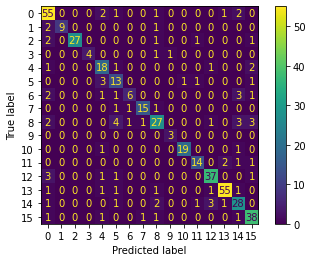

[[55  0  0  0  2  1  0  0  1  0  0  0  0  1  2  0]
 [ 2  9  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 2  0 27  0  0  0  0  0  1  0  0  1  0  0  0  1]
 [ 0  0  0  4  0  0  0  0  1  1  0  0  0  0  0  0]
 [ 1  0  0  0 18  1  0  0  0  0  0  0  1  0  0  2]
 [ 0  0  0  0  3 13  0  0  0  0  1  1  0  0  0  1]
 [ 2  0  0  0  1  1  6  0  0  0  0  0  0  0  3  1]
 [ 0  0  0  0  0  1  1 15  1  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  4  1  1 27  0  0  0  1  0  3  3]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0 19  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 14  0  2  1  1]
 [ 3  0  0  0  1  1  0  0  0  0  0  0 37  0  0  1]
 [ 1  0  0  0  1  1  0  0  1  0  0  0  1 55  1  0]
 [ 1  0  0  0  0  1  0  0  2  0  0  1  3  1 28  0]
 [ 1  0  0  0  1  0  0  1  1  0  0  0  0  0  1 38]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.83        62
           1       1.00      0.75      0.86        12
           2       1

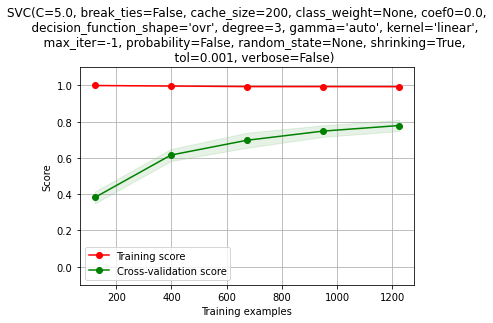

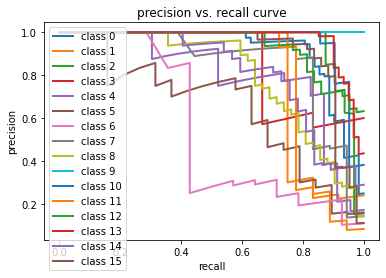

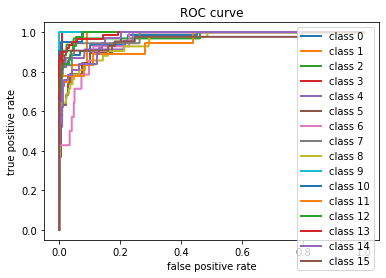

In [21]:
# SVM using TFIDF after Dimension Reduction by PCA,TruncatedSVD

# fit TFIDF after PCA
SVM = SVC(C=1, kernel='poly', degree=1, gamma='auto')#, class_weight='balanced')
SVM.fit(train_X_pca,train_Y)

predictions_SVM = SVM.predict(train_X_pca)
print("SVM TFIDF PCA Train Accuracy = ",accuracy_score(predictions_SVM, train_Y)*100)
predictions_SVM = SVM.predict(test_X_pca)
print("SVM TFIDF PCA Test Accuracy = ",accuracy_score(predictions_SVM, test_Y)*100)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(0,28))
# disp.plot(include_values=True, cmap='viridis', xticks_rotation='horizontal', values_format=None, ax=None)
# plt.figure(figsize=(10,10))
plot_confusion_matrix(SVM, test_X_pca, test_Y)  # doctest: +SKIP
# fig = cmd.figure_
plt.show()
print(confusion_matrix(test_Y,predictions_SVM))
print(classification_report(test_Y,predictions_SVM))

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# fit TFIDF after TruncatedSVD
SVM = SVC(C=5.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(train_X_svd,train_Y)

predictions_SVM = SVM.predict(train_X_svd)
print("SVM TFIDF SVD Train Accuracy= ",accuracy_score(predictions_SVM, train_Y)*100)
predictions_SVM = SVM.predict(test_X_svd)
print("SVM TFIDF SVD Test Accuracy= ",accuracy_score(predictions_SVM, test_Y)*100)
# print("Jaccard Score=", jaccard_score(test_Y,predictions_SVM, average='weighted'))

# BENCHMARKING

# plot confusion matrix
#plt.figure(figsize=(15,15))
# %matplotlib inline
plot_confusion_matrix(SVM, test_X_svd, test_Y)
plt.show()
print(confusion_matrix(test_Y,predictions_SVM))

# print classification report
print(classification_report(test_Y,predictions_SVM))

# evaluate the model
eval_model(SVM, train_X_svd, train_Y)

# plot curves
plot_learning_curves(SVM, train_X_svd, train_Y)
# plot_error_curves(SVM, train_X_svd, train_Y)
SVM = SVC(C=5.0, kernel='linear', degree=3, gamma='auto', probability=True)
plot_pr_curves(SVM, train_X_svd, test_X_svd, train_Y, test_Y)
plot_roc_curves(SVM, train_X_svd, test_X_svd, train_Y, test_Y)

#### Poly SVM

SVM TFIDF SVD Train Accuracy=  99.26578560939795
SVM TFIDF SVD Test Accuracy=  72.68722466960352


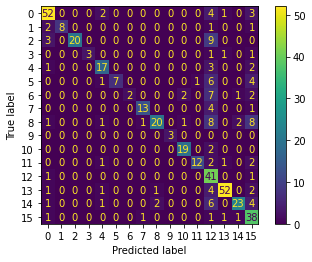

[[52  0  0  0  2  0  0  0  0  0  0  0  4  1  0  3]
 [ 2  8  0  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 3  0 20  0  0  0  0  0  0  0  0  0  9  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  1  1  0  1]
 [ 1  0  0  0 17  0  0  0  0  0  0  0  3  0  0  2]
 [ 0  0  0  0  1  7  0  0  0  0  0  1  6  0  0  4]
 [ 0  0  0  0  0  0  2  0  0  0  2  0  7  0  1  2]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  4  0  0  1]
 [ 1  0  0  0  1  0  0  1 20  0  1  0  8  0  2  8]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 19  0  2  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 12  2  1  0  2]
 [ 1  0  0  0  0  0  0  0  0  0  0  0 41  0  0  1]
 [ 1  0  0  0  1  0  0  0  1  0  0  0  4 52  0  2]
 [ 1  0  0  0  1  0  0  0  2  0  0  0  6  0 23  4]
 [ 1  0  0  0  0  0  0  1  0  0  0  0  1  1  1 38]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83        62
           1       1.00      0.67      0.80        12
           2       1

In [22]:
# fit TFIDF after TruncatedSVD
SVM = SVC(C=1.0, kernel='poly', degree=3, gamma=1.0)
SVM.fit(train_X_svd,train_Y)

predictions_SVM = SVM.predict(train_X_svd)
print("SVM TFIDF SVD Train Accuracy= ",accuracy_score(predictions_SVM, train_Y)*100)
predictions_SVM = SVM.predict(test_X_svd)
print("SVM TFIDF SVD Test Accuracy= ",accuracy_score(predictions_SVM, test_Y)*100)
# print("Jaccard Score=", jaccard_score(test_Y,predictions_SVM, average='weighted'))

#plt.figure(figsize=(15,15))
# %matplotlib inline
plot_confusion_matrix(SVM, test_X_svd, test_Y)
plt.show()
print(confusion_matrix(test_Y,predictions_SVM))
print(classification_report(test_Y,predictions_SVM))
print()
eval_model(SVM, train_X_svd, train_Y)
print()

### KNN

KNN TFIDF SVD Train Accuracy ->  99.41262848751835
KNN TFIDF SVD Test Accuracy ->  74.22907488986785

StratifiedKFold CV Accuracy: 0.736 (0.044)



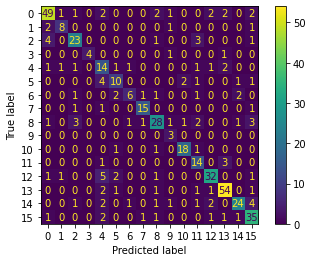

[[49  1  1  0  2  0  0  0  2  1  0  0  2  2  0  2]
 [ 2  8  0  0  0  0  0  0  0  1  0  0  0  0  0  1]
 [ 4  0 23  0  0  0  0  0  1  0  0  3  0  0  0  1]
 [ 0  0  0  4  0  0  0  0  0  1  0  0  0  1  0  0]
 [ 1  1  1  0 14  1  1  0  0  0  0  1  1  2  0  0]
 [ 0  0  0  0  4 10  0  0  0  0  2  1  0  0  1  1]
 [ 0  0  1  0  0  2  6  1  1  0  0  1  0  0  2  0]
 [ 0  0  1  0  1  0  0 15  0  0  0  0  0  0  0  1]
 [ 1  0  3  0  0  0  1  1 28  1  1  2  0  0  1  3]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  1  0 18  1  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 14  0  3  0  0]
 [ 1  1  0  0  5  2  0  0  1  0  0  0 32  0  0  1]
 [ 0  0  0  0  2  1  0  0  1  0  0  1  1 54  0  1]
 [ 0  0  1  0  2  0  1  0  1  1  0  1  2  0 24  4]
 [ 1  0  0  0  2  0  0  1  1  0  0  0  1  1  1 35]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81        62
           1       0.73      0.67      0.70        12
           2       0

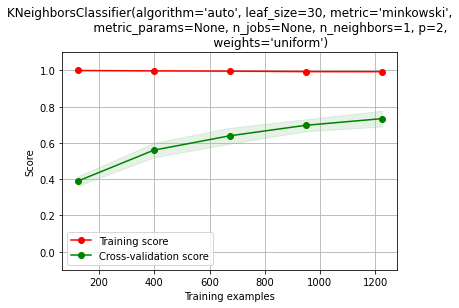

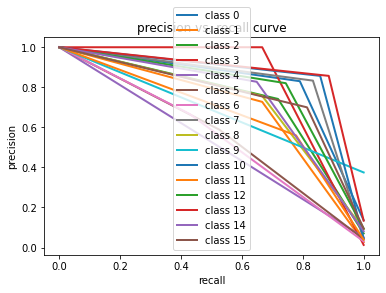

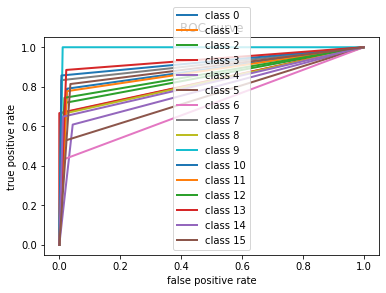

In [23]:
# KNN

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X_svd,train_Y) 

predict_knn=knn.predict(train_X_svd)
print("KNN TFIDF SVD Train Accuracy -> ",accuracy_score(predict_knn,train_Y)*100)
predict_knn=knn.predict(test_X_svd)
print("KNN TFIDF SVD Test Accuracy -> ",accuracy_score(predict_knn,test_Y)*100)
print()
eval_model(knn, train_X_svd, train_Y)
print()

plot_confusion_matrix(knn, test_X_svd, test_Y)  # doctest: +SKIP
plt.show()
print(confusion_matrix(test_Y,predict_knn))
print(classification_report(test_Y,predict_knn))
eval_model(knn, train_X_svd, train_Y)

plot_learning_curves(knn, train_X_svd, train_Y)
# plot_error_curves(knn, train_X_svd, train_Y)
plot_pr_curves(knn, train_X_svd, test_X_svd, train_Y, test_Y)
plot_roc_curves(knn, train_X_svd, test_X_svd, train_Y, test_Y)

### Random Forests

RF, Count Train Accuracy :  99.41262848751835
RF, Count Test Accuracy :  76.2114537444934
####################################################################################################
####################################################################################################
####################################################################################################
RF, TFIDF Train Accuracy :  99.41262848751835
RF, TFIDF Test Accuracy :  63.21585903083701
####################################################################################################
####################################################################################################
####################################################################################################
RF, TF-IDF PCA Train Accuracy :  99.41262848751835
RF, TF-IDF PCA Test Accuracy:  54.18502202643172
####################################################################################################
############

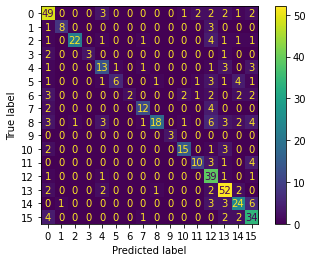

[[49  0  0  0  3  0  0  0  0  0  1  2  2  2  1  2]
 [ 1  8  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 1  0 22  0  1  0  0  1  0  0  0  0  4  1  1  1]
 [ 2  0  0  3  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 1  0  0  0 13  1  0  1  0  0  0  0  1  3  0  3]
 [ 1  0  0  0  1  6  0  0  1  0  0  1  3  1  4  1]
 [ 3  0  0  0  0  0  2  0  0  0  2  1  2  0  2  2]
 [ 2  0  0  0  0  0  0 12  0  0  0  0  4  0  0  0]
 [ 3  0  1  0  3  0  0  1 18  0  1  0  6  3  2  4]
 [ 0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0 15  0  1  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  3  1  0  4]
 [ 1  0  0  0  1  0  0  0  0  0  0  0 39  1  0  1]
 [ 2  0  0  0  2  0  0  0  1  0  0  0  2 52  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  3  3 24  6]
 [ 4  0  0  0  0  0  0  1  0  0  0  0  0  2  2 34]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73        62
           1       0.89      0.67      0.76        12
           2       0

In [ ]:
# RF using Count Vectors

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X_count,train_Y)

preds = rf_model.predict(train_X_count)
print ("RF, Count Train Accuracy : ", accuracy_score(preds,train_Y)*100)
preds = rf_model.predict(test_X_count)
print ("RF, Count Test Accuracy : ", accuracy_score(preds,test_Y)*100)
# print(classification_report(valid_Y,preds))

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# RF using TF-IDF Vectors

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X_tfidf,train_Y)

preds = rf_model.predict(train_X_tfidf)
print ("RF, TFIDF Train Accuracy : ", accuracy_score(preds,train_Y)*100)
preds = rf_model.predict(test_X_count)
print ("RF, TFIDF Test Accuracy : ", accuracy_score(preds,test_Y)*100)
# print(classification_report(valid_Y,preds))

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# RF on Word Level TF IDF Vectors after PCA

rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(train_X_pca,train_Y)

preds = rf_model.predict(train_X_pca)
print ("RF, TF-IDF PCA Train Accuracy : ", accuracy_score(preds, train_Y)*100)
preds = rf_model.predict(test_X_pca)
print ("RF, TF-IDF PCA Test Accuracy: ", accuracy_score(preds, test_Y)*100)
# print(classification_report(valid_Y,preds))

#############################################################################################################
print('#'*100)
print('#'*100)
print('#'*100)
#############################################################################################################

# RF using TF-IDF Vectors after TruncatedSVD

rf_model = RandomForestClassifier(n_estimators=100, random_state=1)
rf_model.fit(train_X_svd,train_Y)
preds = rf_model.predict(train_X_svd)
print ("RF, TF-IDF SVD Train Accuracy : ", accuracy_score(preds, train_Y)*100)
preds = rf_model.predict(test_X_svd)
print ("RF, TF-IDF SVD Test Accuracy : ", accuracy_score(preds, test_Y)*100)

plot_confusion_matrix(rf_model, test_X_svd, test_Y)  # doctest: +SKIP
plt.show()
print(confusion_matrix(test_Y,preds))
print(classification_report(test_Y,preds))
eval_model(rf_model, train_X_svd, train_Y)

# Debug
plot_learning_curves(rf_model, train_X_svd, train_Y)
# plot_error_curves(rf_model, train_X_svd, train_Y)
plot_pr_curves(rf_model,train_X_svd, test_X_svd, train_Y, test_Y)
plot_roc_curves(rf_model,train_X_svd, test_X_svd, train_Y, test_Y)

### Adaboost

In [ ]:
# ##Using boosting algorithms - adaboost

# # adaboost classifier

# classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.5, random_state=1)
# classifier.fit(train_X_pca, train_Y)
# preds = classifier.predict(train_X_pca)
# print ("Adaboost, TF-IDF and after PCA train: ", accuracy_score(preds, train_Y)*100)
# preds = classifier.predict(test_X_pca)
# print ("Adaboost, TF-IDF PCA valid: ", accuracy_score(preds, test_Y)*100)
# # print(classification_report(valid_Y,preds))

# # print('-'*100)

# # evaluate the model
# # cv = StratifiedKFold(n_splits=10)
# # n_scores = cross_val_score(classifier, train_X_pca, train_Y, scoring='accuracy', cv=cv, error_score='raise',verbose=1,n_jobs=-1)
# # report performance
# # print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# # scoring = ['precision', 'recall', 'f1']
# # scores = cross_validate(classifier, train_X_pca, train_Y, cv=cv,
# #                         return_train_score=False, verbose=True)
# # print(scores)

# #plot curves
# # plot_curves(classifier, train_X_pca, train_Y)

# #plot error curves
# #plot_error_curves(classifier, train_X_pca, train_Y)

# #############################################################################################################
# print('#'*100)
# print('#'*100)
# print('#'*100)
# #############################################################################################################

# # adaboost classifier

# classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.5, random_state=1)
# classifier.fit(train_X_svd, train_Y)
# preds = classifier.predict(train_X_svd)
# print ("Adaboost, TF-IDF and after SVD train: ", accuracy_score(preds, train_Y)*100)
# preds = classifier.predict(test_X_svd)
# print ("Adaboost, TF-IDF and after SVD valid: ", accuracy_score(preds, test_Y)*100)
# print(classification_report(test_Y,preds))

# # print('-'*100)

# # # evaluate the model
# # cv = StratifiedKFold(n_splits=10)
# # n_scores = cross_val_score(classifier, train_X_svd, train_Y, scoring='accuracy', cv=cv, error_score='raise',verbose=1, n_jobs=-1)
# # # report performance
# # print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# # scoring = ['precision', 'recall', 'f1']
# # scores = cross_validate(classifier, train_X_svd, train_Y, cv=cv,
# #                         return_train_score=False, verbose=True)
# # print(scores)

# #plot curves
# # plot_curves(classifier, train_X_svd, train_Y)

# #plot error curves
# #plot_error_curves(classifier, train_X_svd, train_Y)